# Doordash Delivery Analysis

Tasks:
1. Create an Unique Key for each delivery (Index column)
2. Fix 'created_at' & 'actual_delivery_time' data types
3. Parse Date/Time from created_at
4. Parse Date/Time from actual_delivery_time
5. Create delivery_time: actual_time - created_time
6. Reformat dollar amounts: columns=['subtotal', 'min_item_price', 'max_item_price', ]
6. Visualize average delivery time for each market
7. Visualize average delivery time for each order_protocol

Dashboard Ideas:  
Store Performance (Order_protocol performance, total sales, average delivery time, slowest delivery time, fastest delivery time)
Market Performance (""""")
Protocol Performance (""""")
Estimated Time vs Actual Delivery Time analysis

Questions: (All questions asking about all time totals & Possible Trends over time)
1. Which market has the most/least deliveries?
    - Which stores/store categories get the most/least deliveries?
2. Which market has the quickest/slowest deliviries on average?
2. Which order protocol has the most/least deliveries?
3. Which order protocol has the quickest/slowest deliveries on average?
4. What does the average delivery time look like for each market look like daily/weekly/monthly/quarterly/annually
5. What does the average delivery time look like for each order_protocol look like daily/weekly/monthly/quartly/annually

## Data Ingestion

In [32]:
import pandas as pd
from datetime import datetime

In [33]:
data = pd.read_csv("https://raw.githubusercontent.com/ShaneJett-DS/Doordash_Delivery_Analysis/main/delivery_data.csv")
data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

## Data Cleaning

### Create An Index Column

In [35]:
data['delivery_id'] = data.index
data = data[['delivery_id', 'market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration']].copy()
data

,delivery_id,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0
197424,197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0
197425,197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0
197426,197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0


In [36]:
data.columns

Index(['delivery_id', 'market_id', 'created_at', 'actual_delivery_time',
       'store_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

### Parse Dates & Times from Datetime columns

In [37]:


# Convert columns to datetime objects
data['created_at'] = pd.to_datetime(data['created_at'])
data['actual_delivery_time'] = pd.to_datetime(data['actual_delivery_time'])

# Parse out delivery created at info
data['created_at_date'] = pd.to_datetime(data['created_at']).dt.date
data['created_at_time'] = data['created_at'].dt.time

# Parse out delivery delivered at info
data['delivered_at_date'] = pd.to_datetime(data['actual_delivery_time']).dt.date
data['delivered_at_time'] = data['actual_delivery_time'].dt.time

# Create delivery time columns
data['total_delivery_time'] = (data['actual_delivery_time'] - data['created_at'])
data['total_delivery_seconds'] = data['total_delivery_time'].apply(lambda td: td.total_seconds())
data['total_delivery_minutes'] = (data['total_delivery_seconds'] / 60).round(2)
data['total_delivery_time'] = data['total_delivery_time'].astype(str).apply(lambda x: x.split(' ')[-1]) 



data = data[['delivery_id', 'market_id', 'created_at_date', 'delivered_at_date', 'created_at_time',  'delivered_at_time',
             'total_delivery_time', 'total_delivery_seconds', 'total_delivery_minutes', 'store_id', 'store_primary_category', 'order_protocol', 
             'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 
             'total_outstanding_orders', 'estimated_order_place_duration', 'estimated_store_to_consumer_driving_duration']].copy()



data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 22 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   delivery_id                                   197428 non-null  int64  
 1   market_id                                     196441 non-null  float64
 2   created_at_date                               197428 non-null  object 
 3   delivered_at_date                             197421 non-null  object 
 4   created_at_time                               197428 non-null  object 
 5   delivered_at_time                             197421 non-null  object 
 6   total_delivery_time                           197428 non-null  object 
 7   total_delivery_seconds                        197421 non-null  float64
 8   total_delivery_minutes                        197421 non-null  float64
 9   store_id                                      19

### Format Dollar Amounts

In [38]:
data['subtotal'] = data['subtotal'] * .01
data['min_item_price'] = data['min_item_price'] * .01
data['max_item_price'] = data['max_item_price'] * .01

data[['subtotal', 'min_item_price', 'max_item_price']]

,subtotal,min_item_price,max_item_price
0,34.41,5.57,12.39
1,19.00,14.00,14.00
2,19.00,19.00,19.00
3,69.00,6.00,18.00
4,39.00,11.00,16.00
...,...,...,...
197423,13.89,3.45,6.49
197424,30.10,4.05,8.25
197425,18.36,3.00,3.99
197426,11.75,5.35,5.35


### Investigate Missing Values
* With approx. 200K rows of data, deliveries with missing values can be eliminated without losing too much information.
* <b>21,651</b> records removed from the analysis

In [39]:
data.isnull().sum().sort_values(ascending=False)

total_outstanding_orders                        16262
total_busy_dashers                              16262
total_onshift_dashers                           16262
store_primary_category                           4760
order_protocol                                    995
market_id                                         987
estimated_store_to_consumer_driving_duration      526
total_delivery_seconds                              7
total_delivery_minutes                              7
delivered_at_time                                   7
delivered_at_date                                   7
store_id                                            0
total_delivery_time                                 0
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
created_at_time             

In [40]:
data = data.dropna()

data.isnull().sum().sort_values(ascending=False)

delivery_id                                     0
market_id                                       0
estimated_order_place_duration                  0
total_outstanding_orders                        0
total_busy_dashers                              0
total_onshift_dashers                           0
max_item_price                                  0
min_item_price                                  0
num_distinct_items                              0
subtotal                                        0
total_items                                     0
order_protocol                                  0
store_primary_category                          0
store_id                                        0
total_delivery_minutes                          0
total_delivery_seconds                          0
total_delivery_time                             0
delivered_at_time                               0
created_at_time                                 0
delivered_at_date                               0


## Exploratory Data Analysis

### Create 'Total Delivery' Time Column

In [41]:
deliveries = data.copy()

deliveries

,delivery_id,market_id,created_at_date,delivered_at_date,created_at_time,delivered_at_time,total_delivery_time,total_delivery_seconds,total_delivery_minutes,store_id,...,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,0,1.0,2015-02-06,2015-02-06,22:24:17,23:27:16,01:02:59,3779.0,62.98,1845,...,4,34.41,4,5.57,12.39,33.0,14.0,21.0,446,861.0
1,1,2.0,2015-02-10,2015-02-10,21:49:25,22:56:29,01:07:04,4024.0,67.07,5477,...,1,19.00,1,14.00,14.00,1.0,2.0,2.0,446,690.0
8,8,2.0,2015-02-16,2015-02-16,00:11:35,00:38:01,00:26:26,1586.0,26.43,5477,...,4,47.71,3,8.20,16.04,8.0,6.0,18.0,446,289.0
14,14,1.0,2015-02-12,2015-02-12,03:36:46,04:14:39,00:37:53,2273.0,37.88,2841,...,1,15.25,1,15.25,15.25,5.0,6.0,8.0,446,795.0
15,15,1.0,2015-01-27,2015-01-27,02:12:36,03:02:24,00:49:48,2988.0,49.80,2841,...,2,36.20,2,14.25,21.95,5.0,5.0,7.0,446,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,197423,1.0,2015-02-17,2015-02-17,00:19:41,01:24:48,01:05:07,3907.0,65.12,2956,...,3,13.89,3,3.45,6.49,17.0,17.0,23.0,251,331.0
197424,197424,1.0,2015-02-13,2015-02-13,00:01:59,00:58:22,00:56:23,3383.0,56.38,2956,...,6,30.10,4,4.05,8.25,12.0,11.0,14.0,251,915.0
197425,197425,1.0,2015-01-24,2015-01-24,04:46:08,05:36:16,00:50:08,3008.0,50.13,2956,...,5,18.36,3,3.00,3.99,39.0,41.0,40.0,251,795.0
197426,197426,1.0,2015-02-01,2015-02-01,18:18:15,19:23:22,01:05:07,3907.0,65.12,3630,...,1,11.75,1,5.35,5.35,7.0,7.0,12.0,446,384.0


In [42]:
deliveries.groupby('market_id')['total_delivery_minutes'].mean() \
                                                         .reset_index() \
                                                         .rename(columns={'total_delivery_minutes':'average_delivery_minutes'})

,market_id,average_delivery_minutes
0,1.0,51.510108
1,2.0,46.053293
2,3.0,47.437589
3,4.0,47.368560
4,5.0,46.561301
5,6.0,47.845878


In [43]:
 deliveries.groupby('market_id')['delivery_id'].count() \
                                               .reset_index() \
                                               .rename(columns={'delivery_id':'total_deliveries'})

,market_id,total_deliveries
0,1.0,37115
1,2.0,53469
2,3.0,21075
3,4.0,46222
4,5.0,17258
5,6.0,638


In [44]:
market_delivery_totals = pd.pivot_table(data=deliveries, index='created_at_date', columns='market_id', values='delivery_id', aggfunc='count')

market_delivery_totals

market_id,1.0,2.0,3.0,4.0,5.0,6.0
created_at_date,,,,,,
2015-01-21,478,557,222,511,142,6
2015-01-22,1154,1606,697,1523,426,18
2015-01-23,1367,1776,752,1600,490,24
2015-01-24,1601,2331,888,2029,634,27
2015-01-25,1582,2173,892,1872,613,34
2015-01-26,1172,1414,630,1315,413,19
2015-01-27,1126,1506,655,1348,401,18
2015-01-28,1157,1534,606,1459,422,19
2015-01-29,1122,1507,567,1450,439,14


In [45]:
market_delivery_total_minutes = pd.pivot_table(data=deliveries, index='created_at_date', columns='market_id', values='total_delivery_minutes', aggfunc='sum')
market_delivery_total_minutes


market_id,1.0,2.0,3.0,4.0,5.0,6.0
created_at_date,,,,,,
2015-01-21,21884.43,23415.03,9572.24,21302.99,5193.85,188.06
2015-01-22,52709.78,70190.40,29761.76,67907.42,17556.53,765.08
2015-01-23,58706.37,83320.55,30972.33,70991.83,21426.19,1421.38
2015-01-24,73513.82,124741.57,39382.33,104016.87,31679.75,1435.46
2015-01-25,77580.65,100408.08,42934.69,90131.81,28056.40,1764.11
2015-01-26,52682.45,56439.33,27334.93,54510.13,17012.62,840.02
2015-01-27,51477.60,61179.24,29793.59,58535.32,16935.78,772.24
2015-01-28,54034.21,64146.58,28271.21,68696.90,18848.10,870.25
2015-01-29,52302.29,63224.52,24353.33,64316.19,18634.30,660.27


In [46]:
market_delivery_avg_minutes = pd.pivot_table(data=deliveries, index='created_at_date', columns='market_id', values='total_delivery_minutes', aggfunc='mean')
market_delivery_avg_minutes

market_id,1.0,2.0,3.0,4.0,5.0,6.0
created_at_date,,,,,,
2015-01-21,45.783326,42.037756,43.118198,41.688826,36.576408,31.343333
2015-01-22,45.675719,43.705106,42.699799,44.587932,41.212512,42.504444
2015-01-23,42.945406,46.914724,41.186609,44.369894,43.726918,59.224167
2015-01-24,45.917439,53.514187,44.349471,51.265091,49.968060,53.165185
2015-01-25,49.039602,46.207124,48.133061,48.147334,45.769005,51.885588
2015-01-26,44.950896,39.914661,43.388778,41.452570,41.192785,44.211579
2015-01-27,45.717229,40.623665,45.486397,43.423828,42.233865,42.902222
2015-01-28,46.701997,41.816545,46.652162,47.084921,44.663744,45.802632
2015-01-29,46.615232,41.953895,42.951199,44.355993,42.447153,47.162143


## Visualizations

### Delivery Analysis by Market

[]

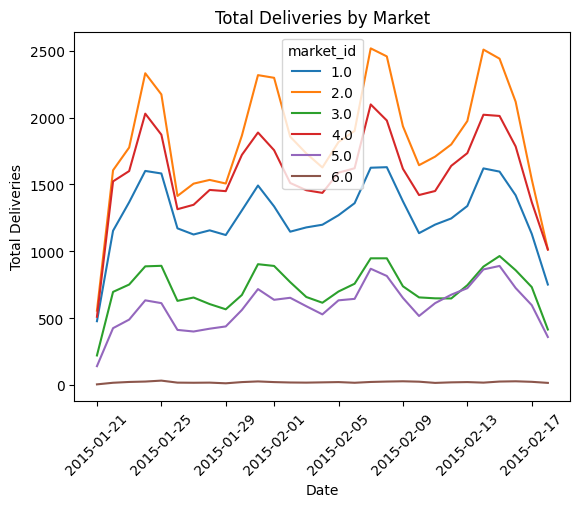

In [77]:
import matplotlib.pyplot as plt


market_delivery_totals.plot(xlabel='Date', ylabel='Total Deliveries', rot=45, title='Total Deliveries by Market')

plt.plot()

[]

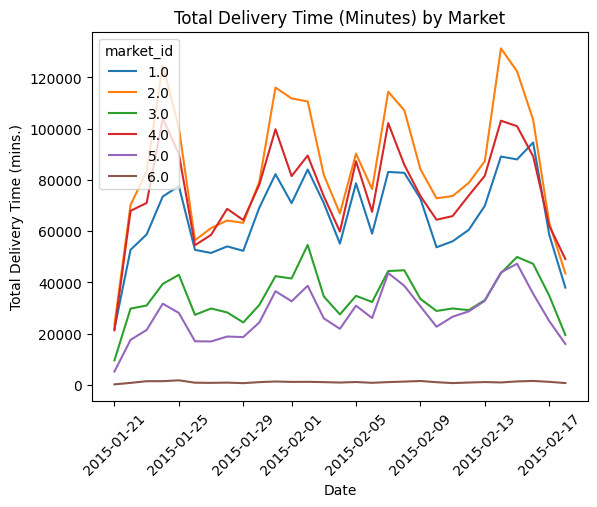

In [78]:
market_delivery_total_minutes.plot(xlabel='Date', ylabel='Total Delivery Time (mins.)', rot=45, title='Total Delivery Time (Minutes) by Market')
plt.plot()

[]

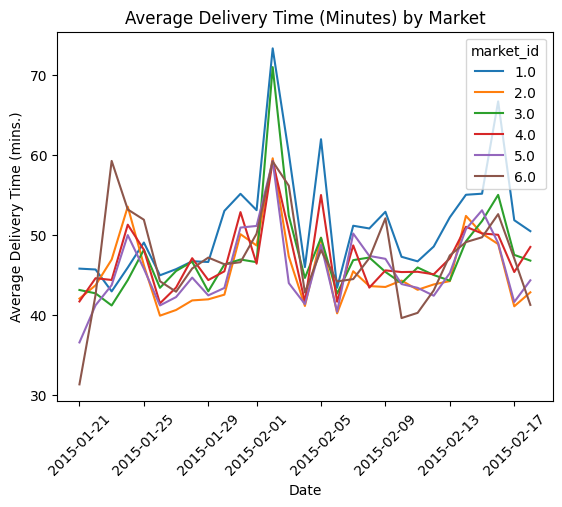

In [79]:
market_delivery_avg_minutes.plot(xlabel='Date', ylabel='Average Delivery Time (mins.)', rot=45, title='Average Delivery Time (Minutes) by Market')
plt.plot()

In [69]:
deliveries.groupby('market_id')['store_id'].count().reset_index()

,market_id,store_id
0,1.0,37115
1,2.0,53469
2,3.0,21075
3,4.0,46222
4,5.0,17258
5,6.0,638


### Sales Analysis

In [70]:
deliveries.groupby('market_id')['subtotal'].sum().reset_index()

,market_id,subtotal
0,1.0,1018599.94
1,2.0,1405595.97
2,3.0,542074.54
3,4.0,1341476.34
4,5.0,416209.83
5,6.0,16944.44


In [71]:
market_total_sales = pd.pivot_table(data=deliveries, index='created_at_date', columns='market_id', values='subtotal', aggfunc='sum')
market_total_sales

market_id,1.0,2.0,3.0,4.0,5.0,6.0
created_at_date,,,,,,
2015-01-21,11214.10,11777.68,4172.56,12295.39,2698.94,116.30
2015-01-22,30409.49,40442.24,17190.13,44413.80,10264.70,470.11
2015-01-23,37167.73,44246.72,18063.85,47172.99,11243.98,742.90
2015-01-24,45746.96,65516.17,24255.45,60185.17,16371.22,583.92
2015-01-25,47206.33,61395.74,25637.58,56957.12,16342.97,1101.72
2015-01-26,30743.66,33575.92,15520.24,36368.81,9354.93,451.44
2015-01-27,30292.15,36852.14,16741.37,38473.10,10088.33,489.79
2015-01-28,31776.16,38754.23,14613.20,41092.57,10270.55,510.20
2015-01-29,31347.46,38217.45,13752.55,42023.13,10619.27,449.48


[]

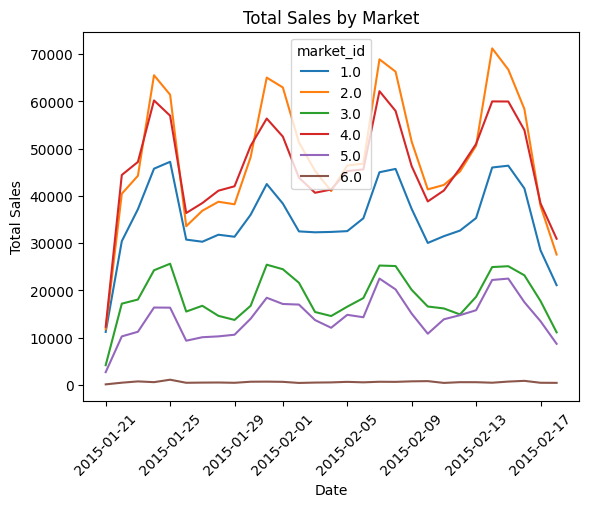

In [80]:
market_total_sales.plot(xlabel='Date', ylabel='Total Sales', rot=45, title='Total Sales by Market')
plt.plot()

In [73]:
market_avg_sales = pd.pivot_table(data=deliveries, index='created_at_date', columns='market_id', values='subtotal', aggfunc='mean')
market_avg_sales

market_id,1.0,2.0,3.0,4.0,5.0,6.0
created_at_date,,,,,,
2015-01-21,23.460460,21.144847,18.795315,24.061429,19.006620,19.383333
2015-01-22,26.351378,25.181968,24.663027,29.162049,24.095540,26.117222
2015-01-23,27.189268,24.913694,24.021077,29.483119,22.946898,30.954167
2015-01-24,28.573991,28.106465,27.314696,29.662479,25.822114,21.626667
2015-01-25,29.839652,28.253907,28.741682,30.425812,26.660636,32.403529
2015-01-26,26.231792,23.745347,24.635302,27.656890,22.651162,23.760000
2015-01-27,26.902442,24.470212,25.559344,28.540875,25.157930,27.210556
2015-01-28,27.464270,25.263514,24.114191,28.164887,24.337796,26.852632
2015-01-29,27.938913,25.359954,24.254938,28.981469,24.189681,32.105714


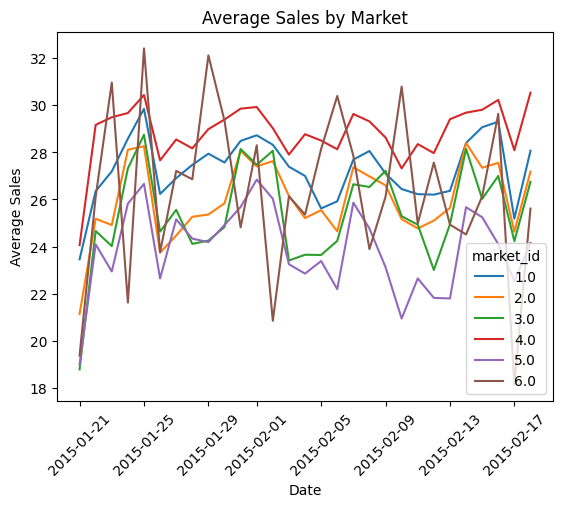

In [81]:
market_avg_sales.plot(xlabel='Date', ylabel='Average Sales', rot=45, title='Average Sales by Market')
plt.show()

## Model Building

## Conclusion